## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247 Winter Quarter 2020, Prof. J.C. Kao, TAs W. Feng, J. Lee, K. Liang, M. Kleinman, C. Zheng

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0,0.5,'$y$')

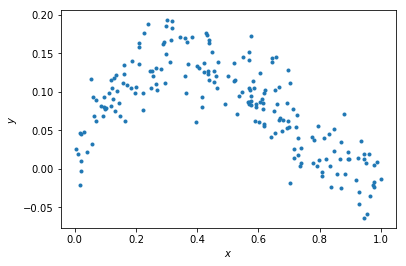

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) $x$ is uniformly distributed with a low of 0 and a high of 1.

(2) $\epsilon$ is normally distributed with mean of 0 and standard deviation of 0.03.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [3]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y))

# ================== #
# END YOUR CODE HERE #
# ================== #

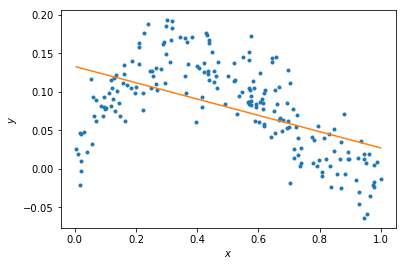

In [4]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model underfits the data.

(2) We can add higher order terms to our model to make it more expressive.

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [5]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

xhats.append(xhat)
thetas.append(theta)

for i in range(1, N):
    xhats.append(np.vstack((x ** (i + 1), xhats[i - 1])))
    thetas.append(np.linalg.inv(xhats[i].dot(xhats[i].T)).dot(xhats[i].dot(y)))
    
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

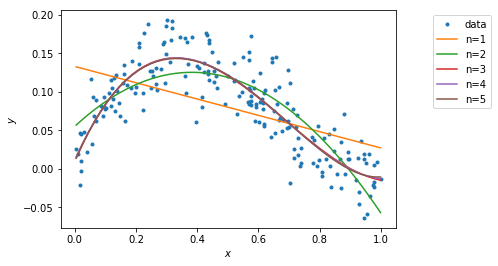

In [6]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5:

$L(\theta) = \frac{1}{2}\sum_{j}(\hat{y}_j - y_j)^2$

In [7]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
for i in range(N):
    yhat = thetas[i].dot(xhats[i])
    training_errors.append(np.sum((yhat - y)**2)/2)

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.2379961088362701, 0.1092492220926853, 0.08169603801105374, 0.08165353735296976, 0.08161479195525295]


### QUESTIONS

(1) Which polynomial model has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The highest order model has the best training error.

(2) The n-th order model will always do as good as a lower order model because the lower order model can be expressed in terms of the higher order model by setting the coefficient of the higher order terms to 0.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate the testing error of polynomial models of orders 1 to 5.

Text(0,0.5,'$y$')

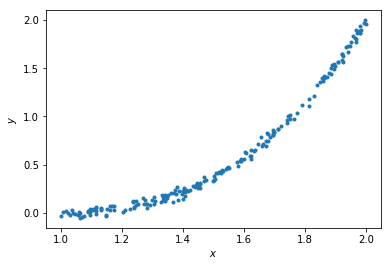

In [8]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [9]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

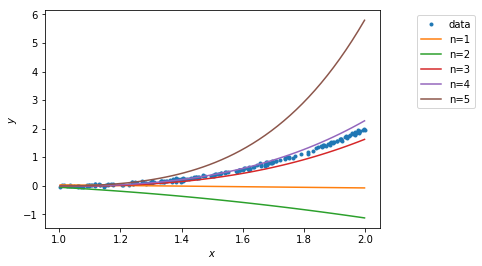

In [10]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [11]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
for i in range(N):
    yhat = thetas[i].dot(xhats[i])
    testing_errors.append(np.sum((yhat - y)**2)/2)

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [80.86165184550586, 213.19192445057908, 3.1256971084083736, 1.1870765211496224, 214.91021747012798]


### QUESTIONS

(1) Which polynomial model has the best testing error?

(2) Why does the order-5 polynomial model not generalize well?

### ANSWERS

(1) The 4th order polynomial model has the best testing error.

(2) The order-5 polynomial model overfit the training data, meaning that it did not capture the underlying distribution of the data well.